# Exercises : Chapter 1
**Jesus Pineda Castro**

**2.** Implement an unsharp masking operation by blurring an image and then subtracting the blurred version from the original. This gives a sharpening effect to the image.

In this tutorial we try this on both color and grayscale images.

With PIL, you can read images from most formats and write to the most common ones. The most important module is the Image module. To read an image, use:

<IPython.core.display.Javascript object>


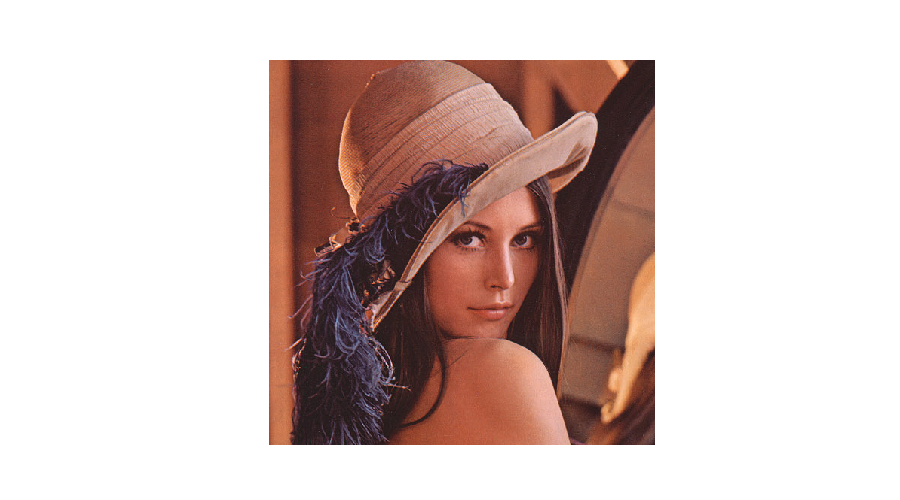

In [6]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
from numpy import *
from scipy.ndimage import filters

# to read an image and convert it to grayscale, just add convert('L') like this:
I_color = Image.open('data/lenna.png')
plt.figure(figsize=(9,5))
plt.imshow(I_color)
plt.axis('off')
plt.show()

To **convert the image to grayscale and HSV**, just add **convert('L') and convert('HSV')** like this:

In [7]:
I_hsv = I_color.convert('HSV')
I_gray = I_color.convert('L')

SciPy comes with a module for filtering called **scipy.ndimage.filters** that can be used to compute the blurring operation. The unsharp masking operation is carried out by blurring an image and then subtracting the blurred version from the original. This gives a sharpening effect to the image. 

**Important:** For color images, first convert to HSV and only apply sharping to value channel (*A simplified version*). For more information click [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3852310/)

The interact function (**ipywidgets.interact**) automatically creates user interface (UI) controls for visualizing the sharpening effect using different *sigma* values:

<IPython.core.display.Javascript object>


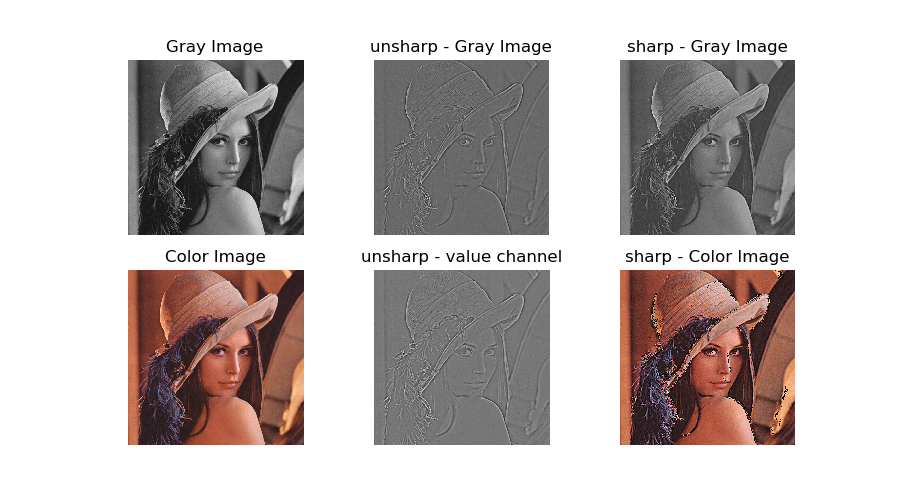

A Jupyter Widget

In [11]:
plt.figure(figsize=(9,5))

amount = 1
def update(sigma=widgets.FloatSlider(min=0,max=10,step=0.1,value=3),\
           weight=widgets.FloatSlider(min=0,max=1,step=0.1,value=1)):
    # For gray Images
    blurred_gray = filters.gaussian_filter(I_gray,sigma)
    unsharp_gray = I_gray - weight*blurred_gray
    sharp_gray = I_gray + unsharp_gray  
    
    
    plt.subplot(231)
    plt.imshow(array(I_gray),cmap='gray')
    plt.title('Gray Image')
    plt.axis('off')
    
    plt.subplot(232)
    plt.imshow(unsharp_gray,cmap='gray')
    plt.title('unsharp - Gray Image')
    plt.axis('off')
    
    plt.subplot(233)
    plt.imshow(sharp_gray,cmap='gray')
    plt.title('sharp - Gray Image')
    plt.axis('off')
    
    #For color Images
    plt.subplot(234)
    plt.imshow(I_color)
    plt.title('Color Image')
    plt.axis('off')
    
    I_hsv_1 = np.array(I_hsv)
    H = I_hsv_1[:,:,0]
    S = I_hsv_1[:,:,1]
    V = I_hsv_1[:,:,2]
    I_Value_blurred = filters.gaussian_filter(V,sigma)
    I_Value_unsharp = V - weight*I_Value_blurred
    I_Value_sharp = V + I_Value_unsharp
    
    plt.subplot(235)
    plt.imshow(I_Value_unsharp,cmap='gray')
    plt.title('unsharp - value channel')
    plt.axis('off')
    
    HSVArray = np.zeros((I_Value_sharp.shape[0],I_Value_sharp.shape[1],3), 'uint8')
    HSVArray[:,:,0] = H # Hue 
    HSVArray[:,:,1] = S # Saturation
    HSVArray[:,:,2] = I_Value_sharp # Value
    
    # Creates an image memory from an object exporting the array interface
    I_color_sharped = Image.fromarray(HSVArray,'HSV').convert('RGB')
    plt.subplot(236)
    plt.imshow(I_color_sharped)
    plt.title('sharp - Color Image')
    plt.axis('off')
    
    plt.show()
        
interact(update);